## The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

### But,In this project we are considering only database_IND to build a model.

In [255]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [256]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

In [550]:
#reading a dataset
df = pd.read_csv("database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


## a)Predicting the primary_fuel

In [551]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

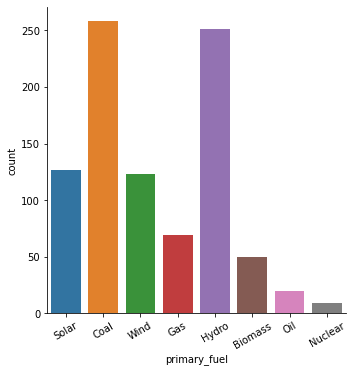

In [552]:
a = sns.factorplot('primary_fuel', data=df, kind="count")
a.set_xticklabels(rotation=30)

with this,we can say that there are more records on "Coal" and "Hydro" compared to other types of fuel.

In [553]:
df.duplicated().sum() #checking for duplicate records

0

In [554]:
#to check how many rows and columns in dataframe
df.shape

(907, 27)

there are like 907 records with 27 columns

In [555]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

with above details,we can observe all the datatypes of each column along with memory consumption of dataset along with some missng values nifo as well

In [556]:
#to check whether any null values present in dataframe
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

So,with this we clearly have many missing values in several columns

In [557]:
#will drop the columns which are having the missing values more then 510

df = df.drop(["generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh","wepp_id","owner","other_fuel1","other_fuel2",
              "other_fuel1","other_fuel3"],axis=1)

In [558]:

#we can also drop columns like country and country_log which are basically containing the same name for all records
df = df.drop(["country","country_long"],axis=1)

In [559]:
#also we don't require the "url" column
df = df.drop(["url"],axis=1)

In [560]:
#also we don't require the "year_of_capacity_data" column
df = df.drop(["year_of_capacity_data"],axis=1)

In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    907 non-null    object 
 1   gppd_idnr               907 non-null    object 
 2   capacity_mw             907 non-null    float64
 3   latitude                861 non-null    float64
 4   longitude               861 non-null    float64
 5   primary_fuel            907 non-null    object 
 6   commissioning_year      527 non-null    float64
 7   source                  907 non-null    object 
 8   geolocation_source      888 non-null    object 
 9   generation_gwh_2014     398 non-null    float64
 10  generation_gwh_2015     422 non-null    float64
 11  generation_gwh_2016     434 non-null    float64
 12  generation_gwh_2017     440 non-null    float64
 13  generation_gwh_2018     448 non-null    float64
 14  generation_data_source  449 non-null    ob

In [562]:

df.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

## Dealing with missing values

In [563]:
#Now,checking for unique values

df['generation_data_source'].unique()

array([nan, 'Central Electricity Authority'], dtype=object)

In [564]:
#Since "generation_data_source" column has only two unique values of "nan" and "Central Electricity Authority"
#so now we can replace those "nan" values as "Unknown"

df['generation_data_source'].fillna("Unknown", inplace=True)

In [565]:
#Now,checking for unique values

df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [566]:
#So,we can impute missing categorical values with mode(most frequent value)

df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [567]:
#Since both longitude and latitude constitute for particular location,so we can just combne these two together first by replaceing "nan" to 0 

df['latitude'] = df['latitude'].fillna(0)
df['longitude'] = df['longitude'].fillna(0)
l = []
for i,j in zip(df['latitude'],df['longitude']):
  if i != 0 and j != 0:
    l.append(str(i)+'~'+str(j))
  else:
    l.append(0)

In [568]:
#creating a new column

df['lat_long'] = l

In [569]:

#now again converting back to 'nan' values from 0
df["lat_long"] = df["lat_long"].apply(lambda x:np.nan if x == 0 else x)

In [570]:
#So,we can impute missing categorical values with mode(most frequent value)

df['lat_long'].fillna(df['lat_long'].mode()[0], inplace=True)

In [571]:
#now we can drop latitude and longitude columns
df = df.drop(['latitude','longitude'],axis=1)

In [572]:
#now,padding for missed values
df['commissioning_year'] = df['commissioning_year'].fillna(method = 'pad')

In [573]:
#also we can impute missing continuous values with mean(Average of all values)

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

In [574]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,lat_long
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown,28.1839~73.2407
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,2011.0,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown,24.7663~74.609
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,2011.0,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown,21.9038~69.3732
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,23.8712~91.3602
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,21.9603~82.4091


In [575]:
df.isnull().sum() #recheck with null values

name                      0
gppd_idnr                 0
capacity_mw               0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
lat_long                  0
dtype: int64

So,we don't have any null values now

## Visualization

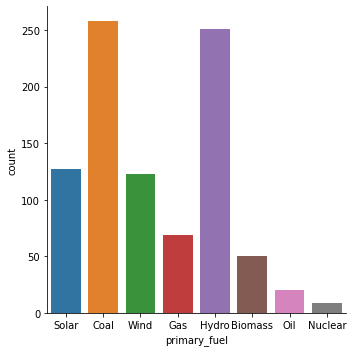

In [576]:
sns.factorplot('primary_fuel', data=df, kind="count") ## Let's check source

with this,we can say that there is clearly a class imbalance exist 
in dataset.so,we can use F1_score as our evaluation metric while training model. 

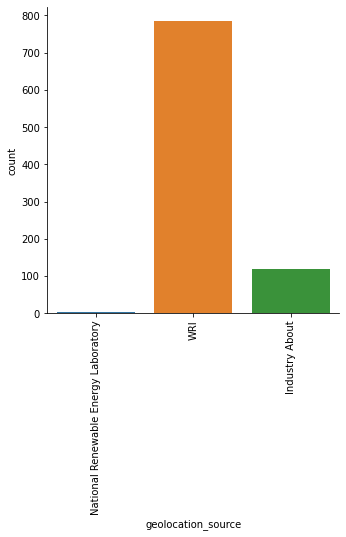

In [577]:
a = sns.factorplot('geolocation_source', data=df, kind="count")
a.set_xticklabels(rotation=90)

So,clearly mostly occured geolocation_source is "WRI".

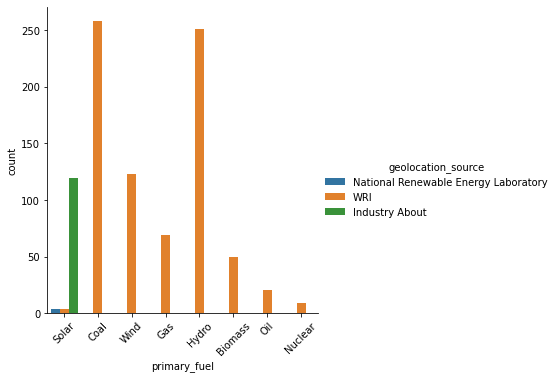

In [578]:
# Now let's seperate the geolocation_source by primary_fuel  using 'hue' arguement 

a = sns.factorplot('primary_fuel', data=df, kind="count", hue='geolocation_source')
a.set_xticklabels(rotation=45)

So,all fuel's have a geolocaton_source as WRI except for solar which conssts mainly of Industry About.

In [579]:
#Since there are objective type columns,so we can use Label encoder method

from sklearn.preprocessing import LabelEncoder

df['name'] = LabelEncoder().fit_transform(df['name'])
df['primary_fuel'] = LabelEncoder().fit_transform(df['primary_fuel'])
df['source'] = LabelEncoder().fit_transform(df['source'])
df['geolocation_source'] = LabelEncoder().fit_transform(df['geolocation_source'])
df['gppd_idnr'] = LabelEncoder().fit_transform(df['gppd_idnr'])
df['generation_data_source'] = LabelEncoder().fit_transform(df['generation_data_source'])
df['lat_long'] = LabelEncoder().fit_transform(df['lat_long'])

In [580]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,lat_long
0,0,657,2.5,6,2011.0,109,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,687
1,1,519,98.0,1,2011.0,174,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,550
2,2,853,39.2,7,2011.0,21,2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,1,376
3,3,0,135.0,2,2004.0,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,0,503
4,4,1,1800.0,1,2015.0,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,379


## Correlation

In [581]:
df.corr()

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,lat_long
name,1.000000,0.332205,0.060240,0.040753,-0.028008,-1.463951e-02,3.622452e-02,8.375890e-02,7.366460e-02,6.617668e-02,7.363387e-02,6.663814e-02,-5.861880e-03,-0.050925
gppd_idnr,0.332205,1.000000,-0.335742,0.609180,0.175809,4.163838e-01,-4.641741e-01,4.451808e-02,3.895798e-02,2.683096e-02,2.285274e-02,1.926543e-02,7.348321e-01,-0.050218
capacity_mw,0.060240,-0.335742,1.000000,-0.380395,0.147044,-2.421218e-01,2.048653e-01,6.943503e-01,7.111899e-01,7.422211e-01,7.575852e-01,7.734556e-01,-4.958331e-01,0.037568
primary_fuel,0.040753,0.609180,-0.380395,1.000000,0.044777,5.361263e-02,-4.832168e-01,-1.247688e-01,-1.248280e-01,-1.310514e-01,-1.320034e-01,-1.369831e-01,4.823393e-01,0.096074
commissioning_year,-0.028008,0.175809,0.147044,0.044777,1.000000,5.680223e-02,-1.630668e-01,1.034371e-01,1.145442e-01,1.326633e-01,1.328336e-01,1.355651e-01,4.536648e-02,0.033972
source,-0.014640,0.416384,-0.242122,0.053613,0.056802,1.000000e+00,-5.057202e-01,1.917854e-18,-2.160931e-17,-4.925637e-17,-1.284552e-16,1.092118e-17,4.848273e-01,-0.016481
geolocation_source,0.036225,-0.464174,0.204865,-0.483217,-0.163067,-5.057202e-01,1.000000e+00,-2.966463e-17,-6.339264e-18,2.904016e-17,8.066490e-17,-1.048582e-17,-3.903486e-01,-0.171710
generation_gwh_2014,0.083759,0.044518,0.694350,-0.124769,0.103437,1.917854e-18,-2.966463e-17,1.000000e+00,9.535943e-01,9.258738e-01,8.916868e-01,8.849556e-01,2.744429e-16,0.001790
generation_gwh_2015,0.073665,0.038958,0.711190,-0.124828,0.114544,-2.160931e-17,-6.339264e-18,9.535943e-01,1.000000e+00,9.688877e-01,9.282425e-01,9.234611e-01,5.686366e-17,-0.002195
generation_gwh_2016,0.066177,0.026831,0.742221,-0.131051,0.132663,-4.925637e-17,2.904016e-17,9.258738e-01,9.688877e-01,1.000000e+00,9.646488e-01,9.571589e-01,4.706666e-17,-0.002182


In [582]:
#w.r.t "primary_fuel"

df.corr()['primary_fuel'].sort_values()

geolocation_source       -0.483217
capacity_mw              -0.380395
generation_gwh_2018      -0.136983
generation_gwh_2017      -0.132003
generation_gwh_2016      -0.131051
generation_gwh_2015      -0.124828
generation_gwh_2014      -0.124769
name                      0.040753
commissioning_year        0.044777
source                    0.053613
lat_long                  0.096074
generation_data_source    0.482339
gppd_idnr                 0.609180
primary_fuel              1.000000
Name: primary_fuel, dtype: float64

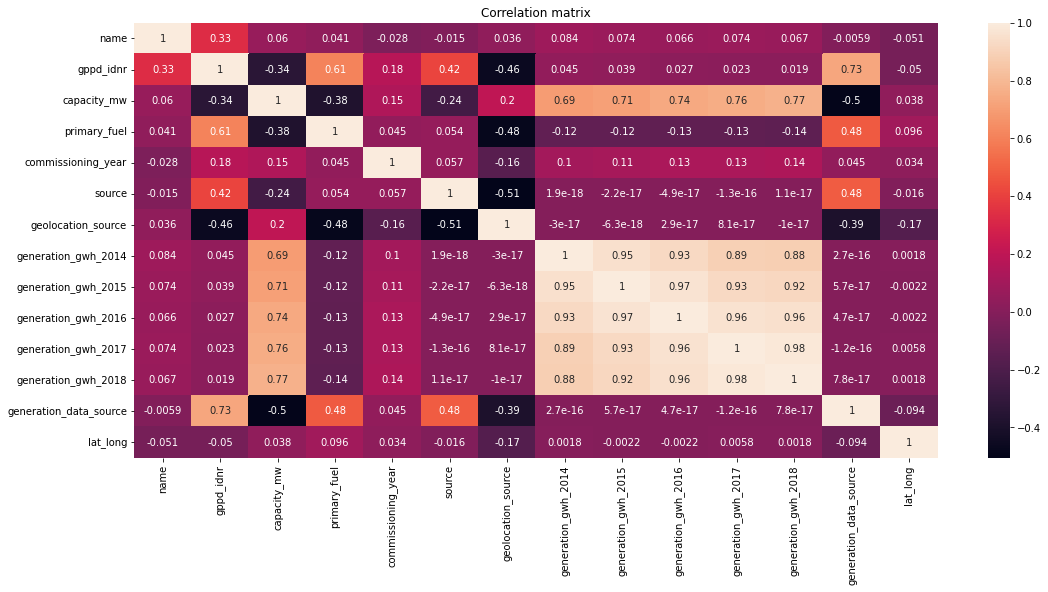

In [583]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

### With above observation,we can see that there are positive and negative correlation with target variable
#### "geolocation_source" has highest negative correlation(48%) with target variable.
#### "commissioning_year" has least negative correlation(5%) with target variable.
#### "gppd_idnr" has highest positive correlation(61%).
#### "name" has least positive correlation(4%) with target variable.

## Checking with outliers

In [584]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:]

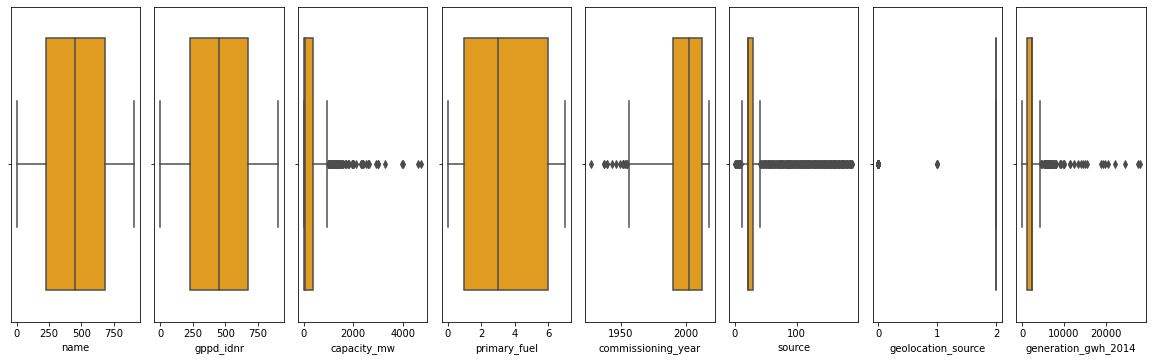

In [585]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

we can see that there are more outliers in "capacity_mw","commissioning_year","source","generaton_gwh_2014" with few being in "geolocation_source".

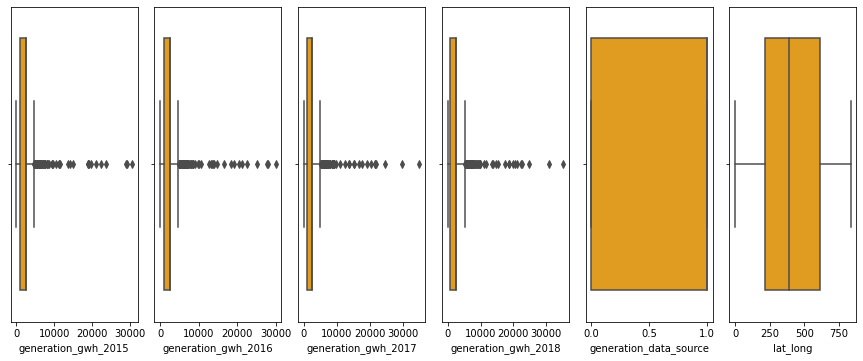

In [586]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (2*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

So,there are more outliers in "gwh_2015","gwh_2016","gwh_2017","gwh_2018"

## checking with Skewness

In [587]:
df.skew().sort_values()

geolocation_source       -2.159841
commissioning_year       -1.197957
generation_data_source   -0.019880
name                      0.000000
gppd_idnr                 0.000000
lat_long                  0.100208
primary_fuel              0.472251
source                    1.827373
capacity_mw               3.123576
generation_gwh_2018       4.937907
generation_gwh_2014       5.035446
generation_gwh_2016       5.068427
generation_gwh_2017       5.110952
generation_gwh_2015       5.364134
dtype: float64

## Removing the outliers

In [588]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(907, 14)

In [589]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(907, 14)
(862, 14)
45


## calcuating the percentage of data loss

In [590]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:4.96%


there is a 4.96% data loss which is good to proceed for further

## Dividing the data into features and vectors

In [591]:
y = df_new[["primary_fuel"]]
x = df_new.drop(["primary_fuel"],axis=1)

## Checking with multicollinearity

In [592]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [593]:
calc_vif_value(x)

,variables,VIF
0,name,5.519589
1,gppd_idnr,13.129065
2,capacity_mw,5.899314
3,commissioning_year,32.692826
4,source,3.192516
5,geolocation_source,12.554088
6,generation_gwh_2014,16.000787
7,generation_gwh_2015,30.006234
8,generation_gwh_2016,34.892292
9,generation_gwh_2017,39.976532


## Reducing the multicollinearity

In [594]:
x["generation_gwh_2017_generation_gwh_2018"] = df.apply(lambda x_1: x_1['generation_gwh_2017'] - x_1['generation_gwh_2018'],axis=1)


In [595]:
x= x.drop(["generation_gwh_2017","generation_gwh_2018"],axis=1)

In [597]:
x["commissioning_year_generation_gwh_2015"] = df.apply(lambda x_1: x_1['commissioning_year'] - x_1['generation_gwh_2015'],axis=1)

In [598]:
x= x.drop(["commissioning_year","generation_gwh_2015"],axis=1)

In [599]:
calc_vif_value(x)

,variables,VIF
0,name,5.492420
1,gppd_idnr,11.901010
2,capacity_mw,5.111467
3,source,2.824694
4,geolocation_source,6.940857
5,generation_gwh_2014,13.141815
6,generation_gwh_2016,17.257312
7,generation_data_source,9.328291
8,lat_long,3.473166
9,generation_gwh_2017_generation_gwh_2018,1.024605


Now,its much better with the previous values


## Transforming data to eliminate skewness

In [600]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[-2.17255242,  0.78197717, -1.6811849 ,  1.64600029, -2.32822892,
         0.35827819,  0.38861457,  0.98160763,  1.10306031,  0.02027178,
        -0.21367123],
       [-2.15234003,  0.32771638,  0.21698217,  2.12047361,  0.39821698,
         0.35827819,  0.38861457,  0.98160763,  0.64115878,  0.02027178,
        -0.21367123],
       [-2.13509979,  1.38144048, -0.28253878, -0.45903294,  0.39821698,
         0.35827819,  0.38861457,  0.98160763, -0.00656716,  0.02027178,
        -0.21367123],
       [-2.11954432, -2.15917481,  0.39086261, -0.38968009,  0.39821698,
        -0.99656849, -0.64187419, -1.01873699,  0.47401357,  0.21027149,
         0.83375809],
       [-2.10513251, -2.13985059,  1.76561763, -0.38968009,  0.39821698,
         0.68901504,  1.92322131, -1.01873699,  0.00536115, -4.88442344,
        -2.43542439]])

In [601]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[-2.17255242,  0.78197717, -1.6811849 ,  1.64600029, -2.32822892,
         0.35827819,  0.38861457,  0.98160763,  1.10306031,  0.02027178,
        -0.21367123],
       [-2.15234003,  0.32771638,  0.21698217,  2.12047361,  0.39821698,
         0.35827819,  0.38861457,  0.98160763,  0.64115878,  0.02027178,
        -0.21367123],
       [-2.13509979,  1.38144048, -0.28253878, -0.45903294,  0.39821698,
         0.35827819,  0.38861457,  0.98160763, -0.00656716,  0.02027178,
        -0.21367123],
       [-2.11954432, -2.15917481,  0.39086261, -0.38968009,  0.39821698,
        -0.99656849, -0.64187419, -1.01873699,  0.47401357,  0.21027149,
         0.83375809],
       [-2.10513251, -2.13985059,  1.76561763, -0.38968009,  0.39821698,
         0.68901504,  1.92322131, -1.01873699,  0.00536115, -4.88442344,
        -2.43542439]])

In [617]:
x_n1 = pd.DataFrame(x)   #rechecking with skewness
x_n1.skew()

0    -0.282086
1    -0.292401
2     0.011582
3    -0.200769
4    -2.117100
5    -0.254392
6    -0.307859
7    -0.037194
8    -0.251130
9    -2.108915
10   -1.286293
dtype: float64

Skewness values has been reduced significantly compared to previous values

## Selecting a best random state

In [602]:
#importing a necessary libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.30,random_state = i)
  DT = DecisionTreeClassifier()
  DT.fit(x_train,y_train)
  predic = DT.predict(x_test)
  acc = f1_score(y_test,predic,pos_label='positive',average='micro')
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best f1_score is ",Max_score," on Random state ",maxRS)

Best f1_score is  0.8416988416988417  on Random state  91


In [603]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =.30,random_state=91)

In [604]:
print(x_train.shape,y_train.shape)

(603, 11) (603, 1)


In [605]:
print(x_test.shape,y_test.shape)

(259, 11) (259, 1)


In [606]:
#using DecisionTree classifier
from sklearn.metrics import confusion_matrix,classification_report # importing metrics
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_2,pos_label='positive',average='micro')))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

f1_score is 0.834
[[ 9  5  1  0  0  0  0  0]
 [ 1 61  4  7  0  2  0  0]
 [ 0  4  3  6  0  2  0  0]
 [ 0  5  3 59  1  1  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.90      0.60      0.72        15
           1       0.80      0.81      0.81        75
           2       0.27      0.20      0.23        15
           3       0.82      0.86      0.84        69
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        36

    accuracy                           0.83       259
   macro avg       0.60      0.56      0.57       259
weighted avg       0.84      0.83      0.84       259



In [607]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_3,pos_label='positive',average='micro')))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

f1_score is 0.811
[[10  3  0  0  0  0  2]
 [ 6 53  3  9  0  0  4]
 [ 0  1  4 10  0  0  0]
 [ 0  7  2 60  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  1  0  0 47  0]
 [ 0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        15
           1       0.82      0.71      0.76        75
           2       0.40      0.27      0.32        15
           3       0.76      0.87      0.81        69
           5       0.00      0.00      0.00         1
           6       1.00      0.98      0.99        48
           7       0.86      1.00      0.92        36

    accuracy                           0.81       259
   macro avg       0.64      0.64      0.64       259
weighted avg       0.80      0.81      0.80       259



In [608]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4,pos_label='positive',average='micro')))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

f1_score is 0.869
[[12  2  1  0  0  0  0]
 [ 1 67  0  7  0  0  0]
 [ 0  5  3  7  0  0  0]
 [ 0  8  2 59  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  0  0  0  0 48  0]
 [ 0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.81      0.89      0.85        75
           2       0.50      0.20      0.29        15
           3       0.81      0.86      0.83        69
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00        48
           7       1.00      1.00      1.00        36

    accuracy                           0.87       259
   macro avg       0.72      0.68      0.69       259
weighted avg       0.86      0.87      0.86       259



In [609]:
#Using Random forest Classifer
from sklearn.linear_model import RidgeClassifier

RC = RidgeClassifier()
RC.fit(x_train,y_train)
predic_4 = RC.predict(x_test)

#Since the class imbalance exists so, we can use F1-score as evaluation metrics
from sklearn.metrics import f1_score
print("f1_score is {:0.3f}".format(f1_score(y_test,predic_4,pos_label='positive',average='micro')))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

f1_score is 0.768
[[ 7  1  0  1  0  0  6]
 [ 0 49  0 12  0  0 14]
 [ 0  7  0  8  0  0  0]
 [ 0  9  0 60  0  0  0]
 [ 0  1  0  0  0  0  0]
 [ 0  1  0  0  0 47  0]
 [ 0  0  0  0  0  0 36]]
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.72      0.65      0.69        75
           2       0.00      0.00      0.00        15
           3       0.74      0.87      0.80        69
           5       0.00      0.00      0.00         1
           6       1.00      0.98      0.99        48
           7       0.64      1.00      0.78        36

    accuracy                           0.77       259
   macro avg       0.59      0.57      0.56       259
weighted avg       0.74      0.77      0.74       259



f1_score is high for RandomForestClassifier model

## Cross Validation to check with overfitting

In [610]:
from sklearn.model_selection import cross_val_score

L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.7541134561096922


In [611]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.7424317784648474


In [612]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.7935004704933459


In [613]:
L_cr = cross_val_score(RC,x,y,cv=5)
print("cross validation for RidgeClassifier model : ",L_cr.mean())

cross validation for RidgeClassifier model :  0.707749697539992


here also,the CV score is more for RandomForestClassifier model. So, I will take my final model as RandomForestClassifier model

## Hyper parameter tuning

In [614]:
from sklearn.model_selection import GridSearchCV

params_list = {'criterion':['gini','entropy'],
               'max_features':['auto','sqrt','log2'],
               'bootstrap':[True,False],
               'max_depth':[None,2,3,4]}
GCV = GridSearchCV(RandomForestClassifier(),params_list,cv=5,scoring="f1")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto'}

In [615]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final score
print("f1_score is",f1_score(y_test,GCV_predic,pos_label='positive',average='micro'))

f1_score is 0.8687258687258688


In [616]:
import joblib
joblib.dump(GCV.best_estimator_,"Global_Power_Plant_Database.pkl")

['Global_Power_Plant_Database.pkl']



---



---



---



# b)Making the prediction on "capacity_mw" based on given features

In [394]:
#reading a dataset
df = pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [395]:
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [396]:
#will drop the columns which are having the missing values more then 510

df = df.drop(["generation_gwh_2013","generation_gwh_2019","estimated_generation_gwh","wepp_id","owner","other_fuel1","other_fuel2",
              "other_fuel1","other_fuel3"],axis=1)

In [397]:
#also we don't require the "year_of_capacity_data" column
df = df.drop(["year_of_capacity_data"],axis=1)

#also we don't require the "url" column
df = df.drop(["url"],axis=1)

#we can also drop columns like country and country_log which are basically containing the same name for all records
df = df.drop(["country","country_long"],axis=1)

In [398]:
#Since "generation_data_source" column has only two unique values of "nan" and "Central Electricity Authority"
#so now we can replace those "nan" values as "Unknown"

df['generation_data_source'].fillna("Unknown", inplace=True)

#So,we can impute missing categorical values with mode(most frequent value)

df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

#Since both longitude and latitude constitute for particular location,so we can just combne these two together first by replaceing "nan" to 0 

df['latitude'] = df['latitude'].fillna(0)
df['longitude'] = df['longitude'].fillna(0)
l = []
for i,j in zip(df['latitude'],df['longitude']):
  if i != 0 and j != 0:
    l.append(str(i)+'~'+str(j))
  else:
    l.append(0)

#creating a new column

df['lat_long'] = l


#now again converting back to 'nan' values from 0
df["lat_long"] = df["lat_long"].apply(lambda x:np.nan if x == 0 else x)

#So,we can impute missing categorical values with mode(most frequent value)

df['lat_long'].fillna(df['lat_long'].mode()[0], inplace=True)

#now we can drop latitude and longitude columns
df = df.drop(['latitude','longitude'],axis=1)

In [399]:
#now,padding for missed values
df['commissioning_year'] = df['commissioning_year'].fillna(method = 'pad')

In [400]:
#also we can impute missing continuous values with mean(Average of all values)

df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean(), inplace=True)
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean(), inplace=True)
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean(), inplace=True)
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean(), inplace=True)
df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean(), inplace=True)

In [401]:
df.head()

,name,gppd_idnr,capacity_mw,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source,lat_long
0,ACME Solar Tower,WRI1020239,2.5,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown,28.1839~73.2407
1,ADITYA CEMENT WORKS,WRI1019881,98.0,Coal,2011.0,Ultratech Cement ltd,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown,24.7663~74.609
2,AES Saurashtra Windfarms,WRI1026669,39.2,Wind,2011.0,CDM,WRI,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,Unknown,21.9038~69.3732
3,AGARTALA GT,IND0000001,135.0,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority,23.8712~91.3602
4,AKALTARA TPP,IND0000002,1800.0,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority,21.9603~82.4091


## Visualization

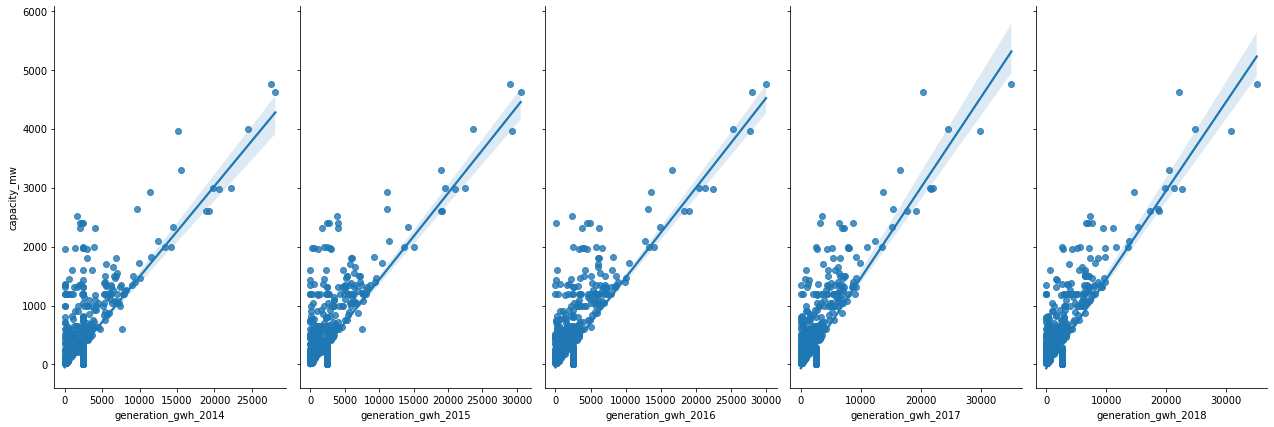

In [402]:
#Since the data is continuous for multiple columns so we use Pairplot

sns.pairplot(df, x_vars=['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016','generation_gwh_2017','generation_gwh_2018'], y_vars='capacity_mw', height=6, aspect=0.6, kind='reg');

clearly the capacity_ws is linear with all these above columns.

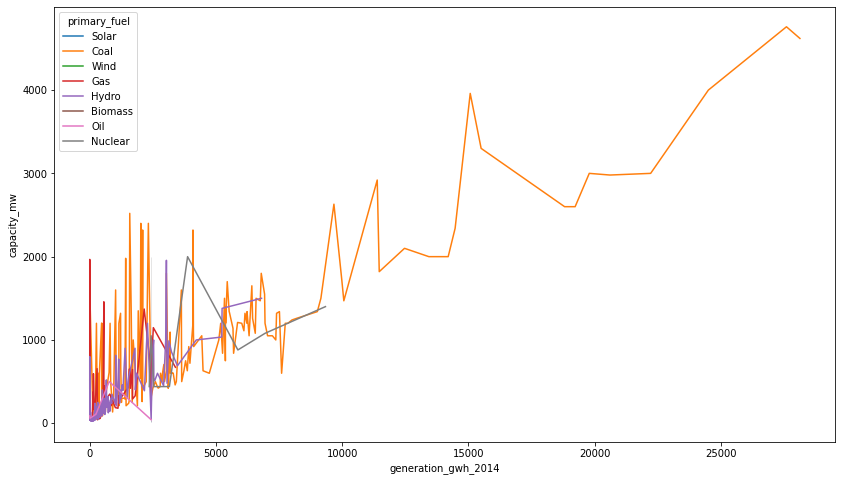

In [403]:
#using lineplot
plt.figure(figsize=(14,8))
sns.lineplot(x="generation_gwh_2014", y="capacity_mw", hue='primary_fuel', data=df)
plt.show()

clearly,the capacity is increasing with generation for "Coal" compared to other fuel types.

In [404]:
#Since there are objective type columns,so we can use Label encoder method

from sklearn.preprocessing import LabelEncoder

df['name'] = LabelEncoder().fit_transform(df['name'])
df['primary_fuel'] = LabelEncoder().fit_transform(df['primary_fuel'])
df['source'] = LabelEncoder().fit_transform(df['source'])
df['geolocation_source'] = LabelEncoder().fit_transform(df['geolocation_source'])
df['gppd_idnr'] = LabelEncoder().fit_transform(df['gppd_idnr'])
df['generation_data_source'] = LabelEncoder().fit_transform(df['generation_data_source'])
df['lat_long'] = LabelEncoder().fit_transform(df['lat_long'])

## Correlation

In [405]:
#w.r.t "capacity_mw"

df.corr()['capacity_mw'].sort_values()

generation_data_source   -0.495833
primary_fuel             -0.380395
gppd_idnr                -0.335742
source                   -0.242122
lat_long                  0.037568
name                      0.060240
commissioning_year        0.147044
geolocation_source        0.204865
generation_gwh_2014       0.694350
generation_gwh_2015       0.711190
generation_gwh_2016       0.742221
generation_gwh_2017       0.757585
generation_gwh_2018       0.773456
capacity_mw               1.000000
Name: capacity_mw, dtype: float64

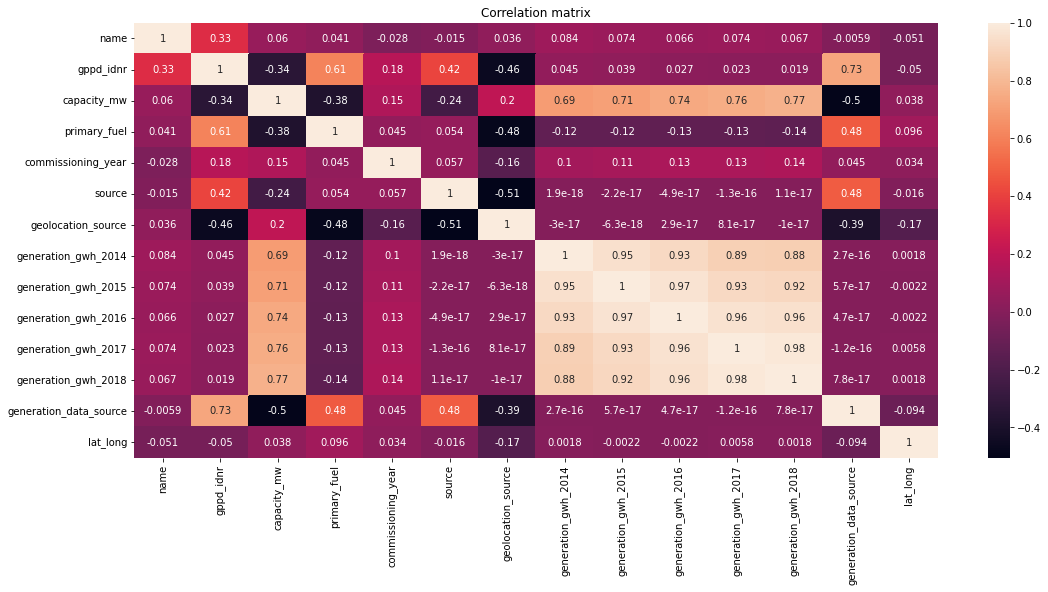

In [406]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

#### 1)columns like "generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017","generation_gwh_2018" have highest postive correlation(>=70%) with target variable.
#### 2)lat_long has least positive correlation(4%).
#### 3)generation_data_source has highest negative correlation(50%) with target variable.
#### 4)source ahs least negative correlation(24%).


## Since we know that outliers present in dataset

## Removing the outliers

In [407]:
#with z-score technique

from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

(907, 14)

In [408]:
threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

(907, 14)
(862, 14)
45


###percentage of data loss

In [409]:
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

data loss percentage:4.96%


there is a 4.96% data loss which is good to proceed for further

## Dividing the data into features and vectors

In [520]:
y = df_new[["capacity_mw"]]
x = df_new.drop(["capacity_mw"],axis=1)

## Checking with multicollinearity

In [521]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [522]:
calc_vif_value(x)

,variables,VIF
0,name,5.670589
1,gppd_idnr,16.298247
2,primary_fuel,7.433177
3,commissioning_year,41.818068
4,source,4.058689
5,geolocation_source,14.848073
6,generation_gwh_2014,15.676753
7,generation_gwh_2015,29.552658
8,generation_gwh_2016,34.358769
9,generation_gwh_2017,39.793024


## Reducing the multicollinearity

In [523]:
x["generation_gwh_2017_generation_gwh_2018"] = df.apply(lambda x_1: x_1['generation_gwh_2017'] - x_1['generation_gwh_2018'],axis=1)
x["commissioning_year_generation_gwh_2015"] = df.apply(lambda x_1: x_1['commissioning_year'] - x_1['generation_gwh_2015'],axis=1)
# x["generation_gwh_2016_generation_gwh_2014"] = df.apply(lambda x_1: x_1['generation_gwh_2016'] - x_1['generation_gwh_2014'],axis=1)
# x= x.drop(["generation_gwh_2016","generation_gwh_2014"],axis=1)
x= x.drop(["commissioning_year","generation_gwh_2015"],axis=1)
x= x.drop(["generation_gwh_2017","generation_gwh_2018"],axis=1)

In [524]:
calc_vif_value(x)

,variables,VIF
0,name,5.603949
1,gppd_idnr,16.176681
2,primary_fuel,6.235453
3,source,3.196057
4,geolocation_source,7.130556
5,generation_gwh_2014,12.669407
6,generation_gwh_2016,12.526586
7,generation_data_source,5.747565
8,lat_long,3.703555
9,generation_gwh_2017_generation_gwh_2018,1.015632


Now,its much better with the previous values

## Transforming data to eliminate skewness

In [525]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[-2.17255242,  0.78197717,  1.14706093,  1.64600029, -2.32822892,
         0.35827819,  0.38861457,  0.98160763,  1.10306031,  0.02027178,
        -0.21367123],
       [-2.15234003,  0.32771638, -1.044165  ,  2.12047361,  0.39821698,
         0.35827819,  0.38861457,  0.98160763,  0.64115878,  0.02027178,
        -0.21367123],
       [-2.13509979,  1.38144048,  1.42813524, -0.45903294,  0.39821698,
         0.35827819,  0.38861457,  0.98160763, -0.00656716,  0.02027178,
        -0.21367123],
       [-2.11954432, -2.15917481, -0.41549557, -0.38968009,  0.39821698,
        -0.99656849, -0.64187419, -1.01873699,  0.47401357,  0.21027149,
         0.83375809],
       [-2.10513251, -2.13985059, -1.044165  , -0.38968009,  0.39821698,
         0.68901504,  1.92322131, -1.01873699,  0.00536115, -4.88442344,
        -2.43542439]])

In [526]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x[:5]

array([[-2.17255242,  0.78197717,  1.14706093,  1.64600029, -2.32822892,
         0.35827819,  0.38861457,  0.98160763,  1.10306031,  0.02027178,
        -0.21367123],
       [-2.15234003,  0.32771638, -1.044165  ,  2.12047361,  0.39821698,
         0.35827819,  0.38861457,  0.98160763,  0.64115878,  0.02027178,
        -0.21367123],
       [-2.13509979,  1.38144048,  1.42813524, -0.45903294,  0.39821698,
         0.35827819,  0.38861457,  0.98160763, -0.00656716,  0.02027178,
        -0.21367123],
       [-2.11954432, -2.15917481, -0.41549557, -0.38968009,  0.39821698,
        -0.99656849, -0.64187419, -1.01873699,  0.47401357,  0.21027149,
         0.83375809],
       [-2.10513251, -2.13985059, -1.044165  , -0.38968009,  0.39821698,
         0.68901504,  1.92322131, -1.01873699,  0.00536115, -4.88442344,
        -2.43542439]])

In [527]:
x_n1 = pd.DataFrame(x)   #rechecking with skewness
x_n1.skew()

0    -0.282086
1    -0.292401
2    -0.055454
3    -0.200769
4    -2.117100
5    -0.254392
6    -0.307859
7    -0.037194
8    -0.251130
9    -2.108915
10   -1.286293
dtype: float64

So,skew values have been reduced


In [547]:
from sklearn.preprocessing import power_transform
y = power_transform(y)
y[:5]

array([[-1.70147868],
       [ 0.22826053],
       [-0.27176585],
       [ 0.40063181],
       [ 1.74343674]])

In [529]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = sc.fit_transform(y)
y[:5]

array([[-1.6811849 ],
       [ 0.21698217],
       [-0.28253878],
       [ 0.39086261],
       [ 1.76561763]])

In [530]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.8052628871898508  on Random state  46


In [531]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =.20,random_state=46)

In [532]:
print(x_train.shape,y_train.shape)

(689, 11) (689, 1)


In [533]:
print(x_test.shape,y_test.shape)

(173, 11) (173, 1)


In [534]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [535]:
#to predict the capacity we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_1)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_1)))

r2_score is 0.805
mse is 0.201
rmse is 0.448
mae is 0.356


In [536]:
from sklearn.model_selection import cross_val_score

In [537]:
#funtion to check accuracy of model using cross validation score

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10) #CVS
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [538]:
model_accuracy(LR)

Accuracy: 72.44 %


In [539]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic_2 = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_2)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_2)))

r2_score is 0.805
mse is 0.201
rmse is 0.448
mae is 0.356


In [540]:
model_accuracy(Bay)

Accuracy: 72.44 %


In [541]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
predic_3 = RF.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_3)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_3)))

r2_score is 0.798
mse is 0.208
rmse is 0.456
mae is 0.313


In [542]:
model_accuracy(RF)

Accuracy: 78.46 %


In [543]:
#using Decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predic_4 = DT.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_4)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_4)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_4,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_4)))

r2_score is 0.653
mse is 0.358
rmse is 0.598
mae is 0.397


In [544]:
model_accuracy(DT)

Accuracy: 60.44 %


So,out of all these models RandomForestRegressor model has more accuracy(even after checking with CVS) and least rmse value. So, I will take my final model as RandomForestRegressor.

## Hyper Paramter tuning

In [545]:
from sklearn.model_selection import GridSearchCV

params_list = {'bootstrap':[True,False],
               'criterion':["squared_error","absolute_error","poisson"],
               'max_features' :['auto','sqrt','log2'],
               'max_leaf_nodes':[2,3,4,None]
              }
GCV = GridSearchCV(RandomForestRegressor(),params_list,cv=5,scoring="neg_root_mean_squared_error")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'bootstrap': True,
 'criterion': 'squared_error',
 'max_features': 'sqrt',
 'max_leaf_nodes': None}

In [549]:
#now predicting with best parameters
GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the r2_score
r2_score(y_test,GCV_predic)
# model_accuracy(GCV.best_estimator_)

0.8132288781402395

In [548]:
import joblib
joblib.dump(GCV.best_estimator_,"Global_Power_Plant_Database2.pkl")

['Global_Power_Plant_Database2.pkl']